# Synthetic data generation

Let’s generate some data on the plane with some amount of noise

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# create synthetic data
n = 1000;
xRange = 4;
x = np.random.uniform(-xRange, xRange, n)

b0 = 1;
b1 = 10;
noiseLevel = 0.1;
noise = np.random.normal(-noiseLevel, noiseLevel, n);
y = np.log(b1*(x**2)+b0) + noise

print("Shape of x is ", x.shape)
x

Shape of x is  (1000,)


array([ 2.23403028, -3.60988649,  0.99740863,  1.33636513, -0.06684267,
        0.39954458, -1.42676801, -2.46390645,  3.49897627, -1.56037465,
        3.39503043, -0.56466556, -2.76951706,  3.8393258 , -0.66248481,
        0.87046743,  2.11135874,  1.04791149,  1.72614036, -3.27127984,
       -1.06221443,  2.15707469, -0.4808818 , -2.63426316, -1.20631397,
       -2.71128687, -0.06171208,  2.85557744, -2.39738308,  3.02648381,
       -0.83955257, -3.65953002, -0.96049191,  0.63327561,  1.92192177,
       -0.47072366, -2.76652126, -1.57908842, -0.14176499,  3.56655869,
       -2.01795784,  3.42823428,  2.9830667 , -3.54386738,  0.75668948,
        3.17312231,  0.60612544,  1.72573354,  2.59774355,  1.05950788,
        3.23484484,  2.16777487,  1.18727687, -1.8553263 , -2.17103886,
       -0.09169925,  0.11311792, -3.03518676, -3.4555482 , -3.3138852 ,
       -3.15794586,  2.80068792, -3.82648348, -1.72144737,  2.51226385,
        2.05812016, -0.75406695,  1.36551985,  3.69206067,  1.50

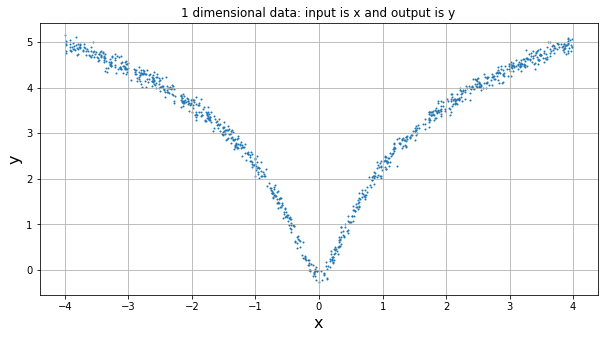

In [2]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s = 1)
plt.title('1 dimensional data: input is x and output is y')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(True)
plt.show()

# Polynomial regression without Scikit-learn: A manual approach

Below lines maps x to higher dimension. 

In [3]:
#e^y=10*x+1

# Log makes our function non-linear. So, we should convert non-linear function to linear function with below mappings.

x1 = x
x2 = x**2
x3 = np.log(b1*(x2)+b0)

Lets do Linear Regression on x1 & x2 & x3 (in mapped higher dimension space)

In [4]:
X = np.column_stack((x1,x2,x3))
X_b = np.c_[np.ones((n,1)),X]
X_b

array([[ 1.        ,  2.23403028,  4.99089129,  3.93003801],
       [ 1.        , -3.60988649, 13.03128051,  4.8775823 ],
       [ 1.        ,  0.99740863,  0.99482397,  2.39317868],
       ...,
       [ 1.        ,  1.63764937,  2.68189547,  3.32571761],
       [ 1.        , -2.48670829,  6.18371812,  4.14054696],
       [ 1.        ,  3.16025055,  9.98718351,  4.61385075]])

In [5]:
w_estimate = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print('[beta0, beta1, beta2] = ', w_estimate)

[beta0, beta1, beta2] =  [-1.05529752e-01 -5.73527810e-05 -1.64107291e-03  1.00446446e+00]


In [6]:
y_hat = X_b.dot(w_estimate)
y_hat

array([ 3.83373523,  4.7726501 ,  2.29664341,  2.84155016, -0.06162804,
        0.85255491,  2.96624283,  4.02547253,  4.71133835,  3.13768394,
        4.65244145,  1.33270997,  4.25435917,  4.8923218 ,  1.58564174,
        2.05187144,  3.72351823,  2.38703232,  3.33215495,  4.58024901,
        2.41209317,  3.76530459,  1.09716047,  4.15632549,  2.64858767,
        4.21275176, -0.06798908,  4.31394985,  3.97192985,  4.42772769,
        1.98815615,  4.79929331,  2.22827013,  1.51248208,  3.54047966,
        1.06742701,  4.25223998,  3.16060449,  0.07839516,  4.74867763,
        3.63557778,  4.67145332,  4.39944812,  4.73662873,  1.8079456 ,
        4.52029907,  1.44270641,  3.33169913,  4.12869766,  2.40727382,
        4.55797485,  3.77496055,  2.61865468,  3.47219714,  3.77814581,
       -0.0244392 ,  0.01538803,  4.43369523,  4.68734852,  4.60554892,
        4.51128364,  4.27595274,  4.88623751,  3.32708803,  4.06321737,
        3.67373442,  1.80210418,  2.88252301,  4.81612766,  3.06

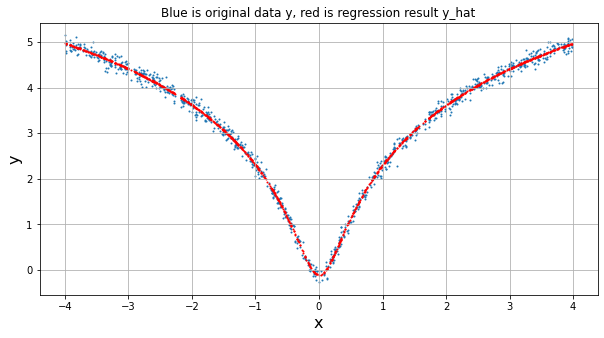

In [7]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s = 1)
plt.scatter(x, y_hat, s = 1, color='red')
plt.title('Blue is original data y, red is regression result y_hat')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(True)
plt.show()







# Polynomial regression with Scikit-learn: A manual approach

Lets use PolynomialFeatures to create x1, x2 and x3 (x1=x, x2=x**2, x3=np.log(b1*(x2)+b0)), compare PolynomialFeatures result and manual approach above

In [8]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=3)
x_input = x[:,np.newaxis]
x_mapped = poly.fit_transform(x_input)
print(x_mapped)

[[  1.           2.23403028   4.99089129  11.14980227]
 [  1.          -3.60988649  13.03128051 -47.04144351]
 [  1.           0.99740863   0.99482397   0.99224601]
 ...
 [  1.           1.63764937   2.68189547   4.39200445]
 [  1.          -2.48670829   6.18371812 -15.37710313]
 [  1.           3.16025055   9.98718351  31.56200214]]


In [9]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_mapped, y)

# Predicting values using our trained model
y_hat = regressor.predict(x_mapped)

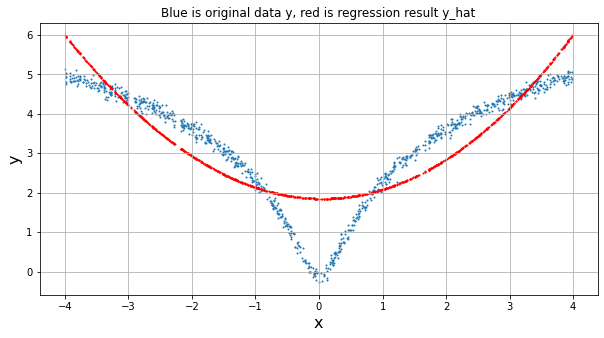

In [10]:
# plotting generated dataset

# x_mapped should be equal to the X_b, but those are not same. So, our graph is not correct. 

plt.figure(figsize=(10, 5))
plt.scatter(x, y, s = 1)
plt.scatter(x, y_hat, s = 1, color='red')
plt.title('Blue is original data y, red is regression result y_hat')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(True)
plt.show()

# Polynomial regression with Scikit-learn: A pipeline approach

<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/pr7.png">

In [11]:
from sklearn.pipeline import Pipeline

poly_regression = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("lin_reg", LinearRegression())
])

x_input = x[:,np.newaxis]
poly_regression.fit(x_input, y)
y_hat = poly_regression.predict(x_input)

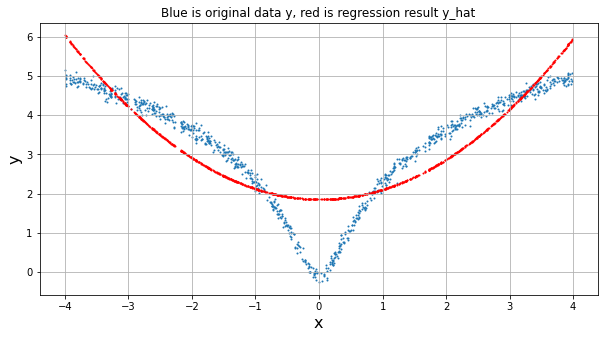

In [12]:
# plotting generated dataset
plt.figure(figsize=(10, 5))
plt.scatter(x, y, s = 1)
plt.scatter(x, y_hat, s = 1, color='red')
plt.title('Blue is original data y, red is regression result y_hat')
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.grid(True)
plt.show()